In [2]:
library(tidyverse)
library(rpart)

In [16]:
BP_high_new <- read.csv("../data/BP_high新データ(部分補完).csv",skip=4)
#　パス変更をしてください。
#　都合上read.csvを使っています。

In [18]:
corrdata <- BP_high_new

In [19]:
targetItem <- "モレ判定"

In [20]:
if(targetItem == "Dry性判定"){
    corrdata%>%select(-モレ判定,-カブレ判定,-Fit性判定,-ムレ判定,-柔らかさ判定,-肌判定)->corrdata
}else if(targetItem == "モレ判定"){
    corrdata%>%select(-Dry性判定,-カブレ判定,-Fit性判定,-ムレ判定,-柔らかさ判定,-肌判定)->corrdata
}else if(targetItem == "カブレ判定"){
    corrdata%>%select(-Dry性判定,-モレ判定,-Fit性判定,-ムレ判定,-柔らかさ判定,-肌判定)->corrdata
}else if(targetItem == "Fit性判定"){
    corrdata%>%select(-Dry性判定,-モレ判定,-カブレ判定,-ムレ判定,-柔らかさ判定,-肌判定)->corrdata
}else if(targetItem == "ムレ判定"){
    corrdata%>%select(-Dry性判定,-モレ判定,-カブレ判定,-Fit性判定,-柔らかさ判定,-肌判定)->corrdata
}else if(targetItem == "柔らかさ判定"){
    corrdata%>%select(-Dry性判定,-モレ判定,-カブレ判定,-Fit性判定,-ムレ判定,-肌判定)->corrdata
}else if(targetItem == "肌判定"){
    corrdata%>%select(-Dry性判定,-モレ判定,-カブレ判定,-Fit性判定,-ムレ判定,-柔らかさ判定)->corrdata
}else{return(cat("教師データの正しい項目名を指定してください。"))}

In [21]:
glimpse(BP_high_new)

Observations: 2,667
Variables: 191
$ ファイル                                                        <fct> M, M, M...
$ 番号                                                            <int> 518, ...
$ 指示書                                                          <int> 21934,...
$ サンプル                                                        <fct> ①, ②, ①...
$ ﾒｰｶｰ                                                            <fct> ﾕﾆ・...
$ サンプル名                                                      <fct> Discover...
$ 不明項目1                                                       <fct> , , , ,...
$ 不明項目２                                                      <fct> , , , , ...
$ サイズ                                                          <fct> M, M, ...
$ 不明項目３                                                      <fct> , , , , ...
$ 発売年月                                                        <fct> , , , ,...
$ 商品名                                                          <fct> M_518_...
$ X101製品概要_製品重量__

In [22]:
# 教師データの欠損除外
corrdata <- corrdata %>% filter(!is.na(corrdata[targetItem]))

In [23]:
dim(corrdata)

[1] 1908  185

In [25]:
xxx <- corrdata

In [24]:
# 1,サイズの列を残す、商品の属性列を消す。
xxx[,2:11]<-NULL

In [26]:
# ２、サイズをカテゴリ型（Rでは因子型）に変換
xxx$ファイル <- as.factor(xxx$ファイル)

In [27]:
# ３、商品名、クラスタ、ABC、カウント　の列を消す。
xxx <- xxx%>%select(-商品名, -cls,-ABC,-カウント)

In [28]:
dim(xxx)

[1] 1908  171

In [29]:
# ４、文字列型とブーリアン型を数値に変換する
xxx <- xxx%>%mutate_if(is.character,as.numeric)
xxx <- xxx%>%mutate_if(is.logical,as.numeric)

In [32]:
# 5,データフレーム型変換
xxx <- as.data.frame(xxx)

In [33]:
# ６、教師データをカテゴリ型変換
xxx[targetItem] <- as.factor(xxx[targetItem][,1])

In [34]:
glimpse(xxx)

Observations: 1,908
Variables: 171
$ ファイル                                                        <fct> M, M, M...
$ X101製品概要_製品重量__                                         <dbl> 34.54800, 3...
$ X102製品概要_製品厚み__                                         <dbl> 4.072000, 4...
$ X103製品概要_二つ折り厚み__5枚重ねで1枚の厚み                   <dbl> 13.87681, 13.87681, 1...
$ X104二つ折り寸法_横方向.胴回り竹内法._WG部_腹側.よこ.           <dbl> 138.2177, 138.2177, 138...
$ X105二つ折り寸法_横方向.胴回り竹内法._WG部_背中側               <dbl> 138.5396, 138.5396, 13...
$ X106二つ折り寸法_横方向.胴回り竹内法._LG.部_腹側                <dbl> 167.6367, 167.6367, 1...
$ X107二つ折り寸法_横方向.胴回り竹内法._LG.部_背中側              <dbl> 168.1756, 168.1756, 16...
$ X108二つ折り寸法_縦方向__腹側.たて.                             <dbl> 194.1065, 194.10...
$ X109二つ折り寸法_縦方向__背中側                                 <dbl> 195.3163, 195.3...
$ X110二つ折り寸法_LG.足繰り.ぐるり.縮み寸法__右足                <dbl> 185.1394, 185.1394, 1...
$ X111二つ折り寸法_LG.足繰り.ぐるり.縮み寸法__左足                <dbl> 188.7663, 188.7663, 1...
$ X112二つ折り寸法_LSG.

In [35]:
#↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
#ファイルと教師データだけがカテゴリ型になっていることが確認できます。

In [36]:
myFormula <- formula(paste(targetItem, "~.", collapse=""))

In [38]:
#モデル構築
rpart(myFormula,xxx,control = rpart.control(cp = 0.001))->A1

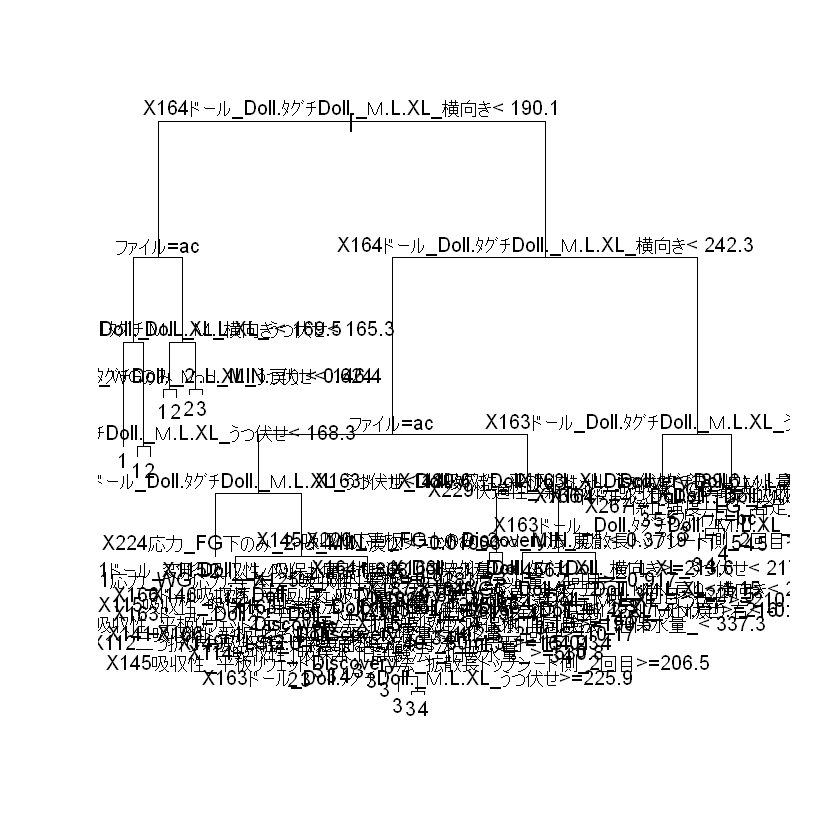

In [40]:
plot(A1)
text(A1)

In [ ]:
#↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
#確認のため、出しています。